
File Count per Transport Mode:
   Transport Mode  File Count
0            walk        2251
4             bus        1306
3            bike        1051
5             car         705
2          subway         508
6            taxi         396
1           train         142
7        airplane          14
9            boat           5
8             run           4
10     motorcycle           1


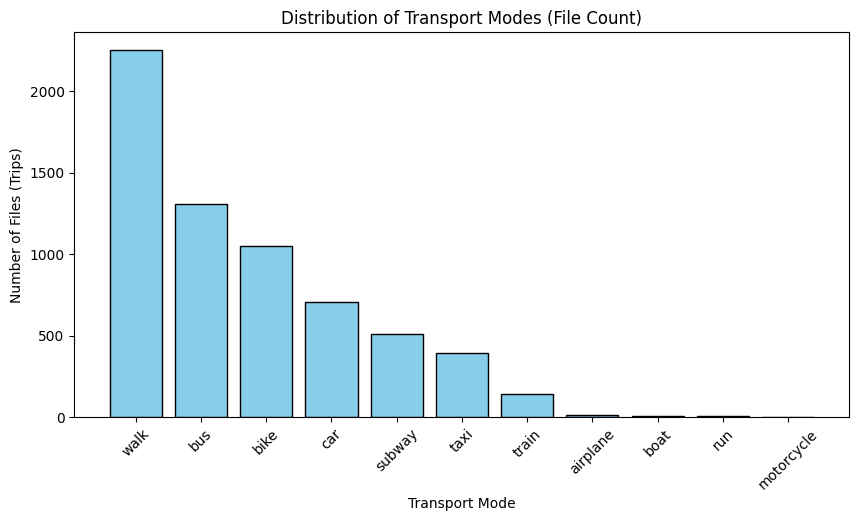

In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset folder path (Adjust as needed)
folder_path = "Sub_Trajectories_Cleaned"

# Find all .geojson files in subdirectories
geojson_files = glob.glob(os.path.join(folder_path, "**/*_cleaned.geojson"), recursive=True)

# Dictionary to count transport modes
transport_mode_counts = {}

# Extract transport modes from filenames
for file in geojson_files:
    filename = os.path.basename(file)
    
    # Extract transport mode from filename (assumes format like 'walk_cleaned.geojson')
    transport_mode = filename.split("_cleaned.geojson")[0]
    
    # Count occurrences
    transport_mode_counts[transport_mode] = transport_mode_counts.get(transport_mode, 0) + 1

# Convert to DataFrame for visualization
df_counts = pd.DataFrame(list(transport_mode_counts.items()), columns=["Transport Mode", "File Count"])
df_counts = df_counts.sort_values(by="File Count", ascending=False)

# Print file count per transport mode
print("\nFile Count per Transport Mode:")
print(df_counts)

# Plot the distribution
plt.figure(figsize=(10, 5))
plt.bar(df_counts["Transport Mode"], df_counts["File Count"], color="skyblue", edgecolor="black")
plt.xlabel("Transport Mode")
plt.ylabel("Number of Files (Trips)")
plt.title("Distribution of Transport Modes (File Count)")
plt.xticks(rotation=45)
plt.show()

In [18]:
import pandas as pd

# Example DataFrame with file counts per transport mode
data = {
    'Transport Mode': ['walk', 'bus', 'bike', 'car', 'subway', 'taxi', 'train', 'airplane', 'boat', 'run', 'motorcycle'],
    'File Count': [2251, 1306, 1051, 705, 508, 396, 142, 14, 5, 4, 1]
}

df_counts = pd.DataFrame(data)
print("Original Distribution:")
print(df_counts)

# Step 1: Merge 'taxi' into 'car'
df_counts['Transport Mode'] = df_counts['Transport Mode'].replace({'taxi': 'car'})

# Step 2: Group by the updated transport modes and sum file counts
df_grouped = df_counts.groupby('Transport Mode', as_index=False)['File Count'].sum()
print("\nAfter Merging 'taxi' with 'car':")
print(df_grouped)

# Step 3: Remove transport modes with very low file counts.
# For example, remove any mode with fewer than 50 files.
threshold = 50
df_filtered = df_grouped[df_grouped['File Count'] >= threshold].reset_index(drop=True)
print("\nAfter Removing Low-Count Modes (threshold < 50):")
print(df_filtered)

Original Distribution:
   Transport Mode  File Count
0            walk        2251
1             bus        1306
2            bike        1051
3             car         705
4          subway         508
5            taxi         396
6           train         142
7        airplane          14
8            boat           5
9             run           4
10     motorcycle           1

After Merging 'taxi' with 'car':
  Transport Mode  File Count
0       airplane          14
1           bike        1051
2           boat           5
3            bus        1306
4            car        1101
5     motorcycle           1
6            run           4
7         subway         508
8          train         142
9           walk        2251

After Removing Low-Count Modes (threshold < 50):
  Transport Mode  File Count
0           bike        1051
1            bus        1306
2            car        1101
3         subway         508
4          train         142
5           walk        2251


In [ ]:
import os
import glob
import geopandas as gpd
import pandas as pd

# Define the folder path where the cleaned sub-trajectories are stored.
folder_path = "Sub_Trajectories_Cleaned"

# Use glob to search recursively for all GeoJSON files in the folder.
geojson_files = glob.glob(os.path.join(folder_path, "**/*.geojson"), recursive=True)
print(f"Number of GeoJSON files found: {len(geojson_files)}")

# List to store individual GeoDataFrames
gdf_list = []

# Loop over each file and load it
for file in geojson_files:
    try:
        gdf = gpd.read_file(file)
        # Optional: Ensure the file contains the key column "transport_mode"
        if "transport_mode" in gdf.columns:
            gdf_list.append(gdf)
        else:
            print(f"Skipping {file}: 'transport_mode' column not found")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Combine all GeoDataFrames if any files were loaded
if gdf_list:
    combined_gdf = pd.concat(gdf_list, ignore_index=True)
    print("Combined GeoDataFrame shape:", combined_gdf.shape)
    
    # Display the first few rows for inspection
    display(combined_gdf.head())
    
    # Optional: If you prefer to drop the geometry column for ML purposes,
    # you can convert it to a regular DataFrame like this:
    combined_df = pd.DataFrame(combined_gdf.drop(columns="geometry"))
    # Save the combined DataFrame to CSV for later use
    combined_df.to_csv("combined_cleaned_data.csv", index=False)
    print("Combined data saved to 'combined_cleaned_data.csv'.")
else:
    print("No GeoJSON files were loaded. Please check the folder path or file format.")

Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10


Number of GeoJSON files found: 6383


Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported OGR type: 10
Skipping field time: unsupported O

Combined GeoDataFrame shape: (2300312, 28)


,lat,lon,zero,altitude,timestamp_days,date,source_folder,file,transport_mode,new_index,...,segment,traj_id,datetime,speed_norm,acceleration_norm,bearing_change_norm,speed_smooth,acceleration_smooth,bearing_change_smooth,geometry
0,39.977403,116.313798,0,0.0,40815.504850,2011-09-29,141,20110929104547.plt,walk,11939780,...,1,20110929104547.plt,2011-09-29 12:06:59,6.915505,1.691237,1.584774,8.874660,0.724830,51.708708,POINT (12947992.803 4862659.137)
1,39.977290,116.313907,0,0.0,40815.504861,2011-09-29,141,20110929104547.plt,walk,11939785,...,1,20110929104547.plt,2011-09-29 12:07:00,6.915505,1.691237,2.080845,6.348523,0.448034,39.487936,POINT (12948004.862 4862642.673)
2,39.977278,116.313893,0,0.0,40815.504896,2011-09-29,141,20110929104547.plt,walk,11939800,...,1,20110929104547.plt,2011-09-29 12:07:03,-0.153924,-0.159360,-0.126497,4.455746,1.029751,40.674455,POINT (12948003.378 4862640.978)
3,39.977438,116.313875,0,0.0,40815.505104,2011-09-29,141,20110929104547.plt,walk,11939804,...,1,20110929104547.plt,2011-09-29 12:07:21,1.618542,5.580465,1.775004,4.099532,0.752955,23.219604,POINT (12948001.337 4862664.221)
4,39.977512,116.313735,0,0.0,40815.505116,2011-09-29,141,20110929104547.plt,walk,11939805,...,1,20110929104547.plt,2011-09-29 12:07:22,5.918635,-0.159360,-0.717620,4.207471,0.999472,30.286397,POINT (12947985.752 4862674.874)


Combined data saved to 'combined_cleaned_data.csv'.


Candidate Features: ['speed_norm', 'acceleration_norm', 'bearing_change_norm', 'speed_smooth', 'acceleration_smooth', 'bearing_change_smooth']

Transport mode distribution after merging 'taxi' into 'car' and removing low-support classes:
transport_mode
bus       607635
walk      511669
car       447439
bike      421485
subway    183830
train     117612
Name: count, dtype: int64

Rows before dropna: 2289670
Rows after dropna: 2289670
Rows removed: 0


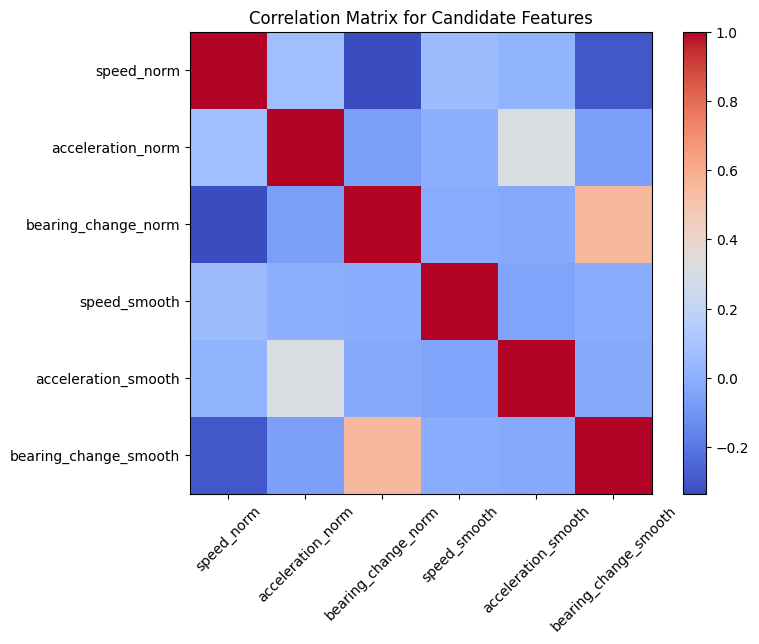


Training set size: 1602769
Test set size: 686901

Training set class distribution:
transport_mode
bus       425345
walk      358168
car       313207
bike      295040
subway    128681
train      82328
Name: count, dtype: int64

Class distribution after hybrid balancing:
transport_mode
bike      425345
bus       425345
car       425345
subway    425345
train     425345
walk      425345
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

        bike      0.732     0.773     0.752    126445
         bus      0.716     0.648     0.680    182290
         car      0.703     0.652     0.676    134232
      subway      0.644     0.673     0.658     55149
       train      0.786     0.891     0.836     35284
        walk      0.772     0.836     0.803    153501

    accuracy                          0.728    686901
   macro avg      0.725     0.745     0.734    686901
weighted avg      0.727     0.728     0.726    686901



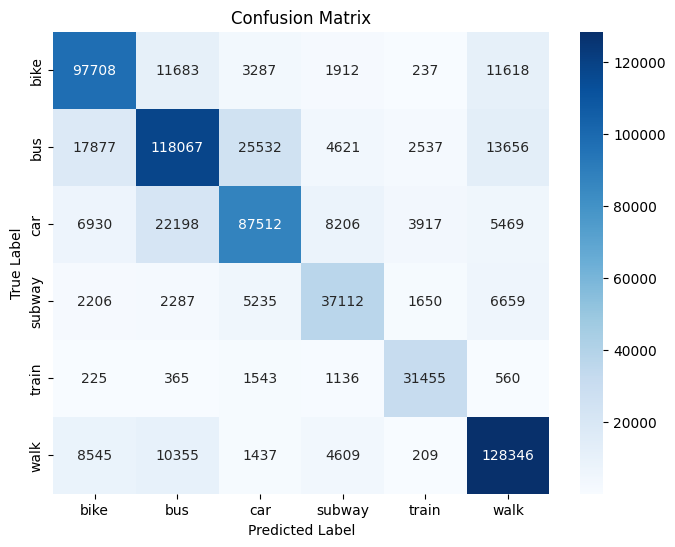

KeyboardInterrupt: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

# For balancing
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# =============================
# Step 1: Load Combined Cleaned Data
# =============================
data_path = "combined_cleaned_data.csv"  # Update path as needed
df = pd.read_csv(data_path)

# =============================
# Step 2: Define Candidate Features
# Use the pre-normalized and smoothed features produced during preprocessing.
candidate_features = [
    'speed_norm', 'acceleration_norm', 'bearing_change_norm',
    'speed_smooth', 'acceleration_smooth', 'bearing_change_smooth'
]
# Filter candidate features to those present in the DataFrame.
candidate_features = [feat for feat in candidate_features if feat in df.columns]
print("Candidate Features:", candidate_features)

# =============================
# Step 2a: Merge and Remove Certain Classes
# Merge "taxi" into "car"
df['transport_mode'] = df['transport_mode'].replace({'taxi': 'car'})

# Remove low-support classes that are too small to balance effectively.
# Based on your distribution, we remove: "motorcycle", "run", "boat", "airplane"
low_support_classes = ["motorcycle", "run", "boat", "airplane"]
df = df[~df['transport_mode'].isin(low_support_classes)]

print("\nTransport mode distribution after merging 'taxi' into 'car' and removing low-support classes:")
print(df['transport_mode'].value_counts())

# =============================
# Step 3: Drop Rows with Missing Values
# Store the initial number of rows.
initial_row_count = df.shape[0]

# Drop rows missing any candidate feature or target variable.
df = df.dropna(subset=candidate_features + ['transport_mode'])

# Log the number of rows removed.
final_row_count = df.shape[0]
removed_rows = initial_row_count - final_row_count
print(f"\nRows before dropna: {initial_row_count}")
print(f"Rows after dropna: {final_row_count}")
print(f"Rows removed: {removed_rows}")

# =============================
# Step 4: Correlation Analysis
# Plot a correlation matrix for the candidate features.
corr_matrix = df[candidate_features].corr()
plt.figure(figsize=(8,6))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(candidate_features)), candidate_features, rotation=45)
plt.yticks(range(len(candidate_features)), candidate_features)
plt.title("Correlation Matrix for Candidate Features")
plt.show()

# =============================
# Step 5: Prepare Data for Modeling
# Define feature matrix X and target y.
X = df[candidate_features]
y = df['transport_mode']

# Since features are pre-normalized, we can use them directly.
X_values = X.values

# =============================
# Step 6: Split Data (Train/Test) Using Stratification
# Stratification ensures the training and testing sets preserve the overall class distribution.
X_train, X_test, y_train, y_test = train_test_split(
    X_values, y, test_size=0.3, stratify=y, random_state=42
)

print("\nTraining set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nTraining set class distribution:")
print(pd.Series(y_train).value_counts())

# =============================
# Step 7: Hybrid Balancing on the Training Set
# First apply SMOTE to oversample minority classes.
smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)

# Then apply RandomUnderSampler to undersample majority classes.
rus = RandomUnderSampler(random_state=42)
X_train_bal, y_train_bal = rus.fit_resample(X_train_over, y_train_over)

print("\nClass distribution after hybrid balancing:")
print(pd.Series(y_train_bal).value_counts())

# =============================
# Step 8: Train a Random Forest Classifier on Balanced Data
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# =============================
# Step 9: Evaluate the Model on the Untouched Test Set
y_pred = rf.predict(X_test)

# Classification Report (Precision, Recall, F1-Score per class)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [2]:
# =============================
# Step 10: Cross-Validation on the Entire Data (Optional)
scores = cross_val_score(rf, X_values, y, cv=5)
print("Random Forest Cross-Validation Accuracy: {:.2f}%".format(np.mean(scores) * 100))

Random Forest Cross-Validation Accuracy: 70.48%
